In [1]:
# Impor libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Load dataset
from google.colab import files
uploaded = files.upload()  # Upload the Employee.csv file

df = pd.read_csv("Employee.csv")

Saving Employee.csv to Employee (1).csv


In [2]:
# Display basic info
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB
None


In [3]:
# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0


In [4]:
# Checking unique values in each column
print("\nUnique Values in Each Column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Each Column:
Company: 6 unique values
Age: 29 unique values
Salary: 40 unique values
Place: 11 unique values
Country: 1 unique values
Gender: 2 unique values


In [5]:
# Rename columns for consistency (if needed)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
# Replace value 0 in 'age' with NaN
df['age'].replace(0, np.nan, inplace=True)

<ipython-input-6-3fbb9d61ccf6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].replace(0, np.nan, inplace=True)


In [7]:
# Handling missing values
df['age'].fillna(df['age'].median(), inplace=True)  # Replace with median
df['salary'].fillna(df['salary'].median(), inplace=True)  # Replace with median
df['company'].fillna(df['company'].mode()[0], inplace=True)  # Replace with mode
df['place'].fillna(df['place'].mode()[0], inplace=True)  # Replace with mode


<ipython-input-7-1088cd676666>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Replace with median
<ipython-input-7-1088cd676666>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [8]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

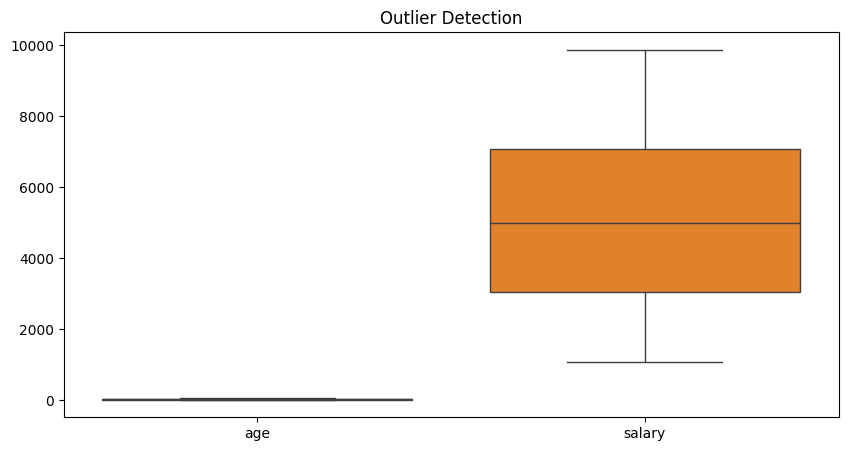

In [9]:
# Detecting outliers using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['age', 'salary']])
plt.title("Outlier Detection")
plt.show()


In [11]:
# Filtering data: Age > 40 & Salary < 5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered Data (Age > 40 & Salary < 5000):")
print(filtered_df)


Filtered Data (Age > 40 & Salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


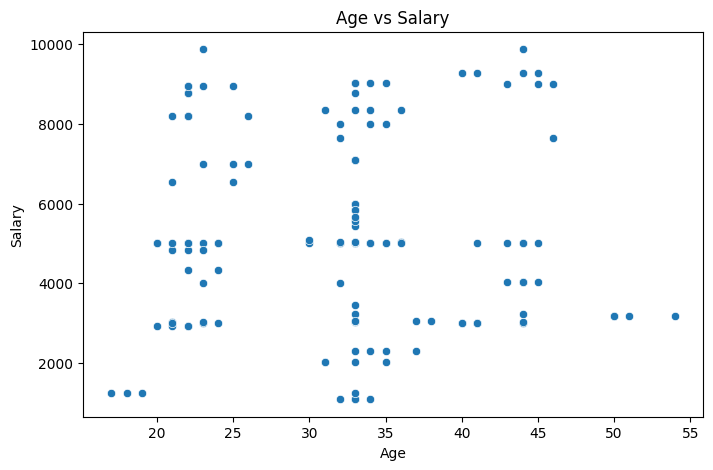

In [12]:
# Plot age vs salary
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['age'], y=df['salary'])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Age vs Salary")
plt.show()

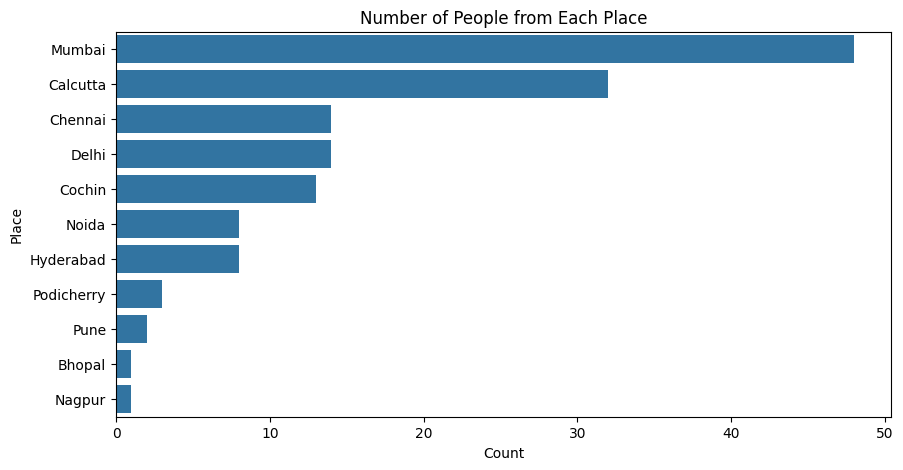

In [13]:
# Countplot of people from each place
plt.figure(figsize=(10, 5))
sns.countplot(y=df['place'], order=df['place'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Place")
plt.title("Number of People from Each Place")
plt.show()

In [14]:
# Encoding categorical variables
label_enc = LabelEncoder()
df['company'] = label_enc.fit_transform(df['company'])
df['place'] = label_enc.fit_transform(df['place'])
df['country'] = label_enc.fit_transform(df['country'])

In [15]:
# One-hot encoding for categorical features (if needed)
df = pd.get_dummies(df, columns=['company', 'place', 'country'], drop_first=True)


In [16]:
# Feature Scaling
scaler = StandardScaler()
df[['age', 'salary']] = scaler.fit_transform(df[['age', 'salary']])


In [17]:
minmax_scaler = MinMaxScaler()
df[['age', 'salary']] = minmax_scaler.fit_transform(df[['age', 'salary']])


In [18]:
# Display final processed dataset
print("\nProcessed Dataset:")
print(df.head())




Processed Dataset:
        age    salary  gender  company_1  company_2  company_3  company_4  \
0  0.081081  0.445089       0      False      False      False       True   
1  0.351351  0.445089       0      False       True      False      False   
2  0.486486  0.137817       0      False      False      False       True   
3  0.621622  0.217480       0      False       True      False      False   
4  0.162162  0.331285       0      False      False      False       True   

   company_5  place_1  place_2  place_3  place_4  place_5  place_6  place_7  \
0      False    False     True    False    False    False    False    False   
1      False    False    False    False    False    False     True    False   
2      False     True    False    False    False    False    False    False   
3      False    False    False    False     True    False    False    False   
4      False    False    False    False    False    False     True    False   

   place_8  place_9  place_10  
0    False

In [19]:
# Save the cleaned dataset
df.to_csv("Processed_Employee.csv", index=False)
print("\nProcessed dataset saved as 'Processed_Employee.csv'")


Processed dataset saved as 'Processed_Employee.csv'
